In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

/home/nlp-vm/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#os.chdir('/home/sarahwie/Documents/pubmed-nlp-research/')
os.chdir('/mnt/mypartition/Desktop2/')

In [3]:
tree = ET.parse('testXMLwrite.xml')
root = tree.getroot()

In [2]:
#using this file for our example (on local only)
xml_file = ET.parse('/home/sarahwie/Documents/zip/subset/zip/medline16n0189.xml')
root = xml_file.getroot()

Note: some strings (in foreign languages/with accent marks) are encoded as unicode (see below). 
But this most likely wont be the case with MUSC's journals.

In [4]:
record = root.getchildren()[0]
title = record.find('Article').find('Journal').find('Title').text
print type(title)
print title

<type 'unicode'>
La semaine des hôpitaux : organe fondé par l'Association d'enseignement médical des hôpitaux de Paris


/home/sarahwie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()


In [183]:
titles = []
titlesUnique = []
for record in root.findall('MedlineCitation'):
    title = record.find('Article').find('Journal').find('Title').text
    #get a list of titles
    titles.append(title)
    #get a list of unique titles
    if title not in titlesUnique:
        titlesUnique.append(title)
print len(titles)
print len(titlesUnique)

32409
3579


In [156]:
#get subset where year of publication >= 2008
titles = []
titlesUnique = []
for record in root.findall('MedlineCitation'):
    title = record.find('Article').find('Journal').find('Title').text
    #get year of publication
    try:
        year = int(record.find('Article').find('Journal').find('JournalIssue').find('PubDate').find('Year').text)
        #only append to list if published after or during 1996
        if year >= 2006:
            #get a list of titles
            titles.append(title)
            #get a list of unique titles
            if title not in titlesUnique:
                titlesUnique.append(title)
    except AttributeError:
        try:
            date = record.find('Article').find('Journal').find('JournalIssue').find('PubDate').find('MedlineDate').text
            #parse year out of date
            if int(date[:4]) >= 2006:
                #get a list of titles
                titles.append(title)
                #get a list of unique titles
                if title not in titlesUnique:
                    titlesUnique.append(title)
        except AttributeError:
            #should be none of these
            print 'Error: record has no date'
print len(titles)
print len(titlesUnique)   

14679
2598


In [40]:
#fixing sum function (one-time thing)
import sys
sum = sys.modules['__builtin__'].sum

In [184]:
#Another try (bar chart this time). Need a diff. layout dataframe than for the histograms.
from collections import Counter

data = Counter(titles).most_common()[0:15]
print data

#get average number of records per journal
datAll = Counter(titles).most_common()
vals = [x[1] for x in datAll]
#sum(vals) is the same of num. elements
#len(datAll) is same as num. distinct journals
avg = sum(vals) / len(datAll)
print avg

datSub = [x for x in datAll if x[1] >= 51]

[('The Journal of biological chemistry', 852), ('Proceedings of the National Academy of Sciences of the United States of America', 281), ('Physical review letters', 242), ('Cancer research', 224), ('American journal of obstetrics and gynecology', 223), ('Circulation', 213), ('The American journal of physiology', 208), ('PloS one', 204), ('Stroke; a journal of cerebral circulation', 199), ('The Journal of pharmacology and experimental therapeutics', 197), ('Brain research', 187), ('The Annals of thoracic surgery', 185), ('Chest', 179), ('The Journal of neuroscience : the official journal of the Society for Neuroscience', 171), ('Journal of immunology (Baltimore, Md. : 1950)', 169)]
9


In [186]:
df = pd.DataFrame(datAll)
df.columns = ['Journal Title', 'Count of Records']
df[0:10]    

,Journal Title,Count of Records
0,The Journal of biological chemistry,852
1,Proceedings of the National Academy of Science...,281
2,Physical review letters,242
3,Cancer research,224
4,American journal of obstetrics and gynecology,223
5,Circulation,213
6,The American journal of physiology,208
7,PloS one,204
8,Stroke; a journal of cerebral circulation,199
9,The Journal of pharmacology and experimental t...,197


In [182]:
#convert all Unicode to ascii
for i in range(len(df)):
    title = df.get_value(i,'Journal Title')
    if type(title) is not str:
        #convert to ascii
        df.set_value(i,'Journal Title',title.encode('utf-8'))
df.to_csv('/mnt/mypartition/Desktop2/journalsCountsLast10Yrs.csv')

In [178]:
df = pd.DataFrame(datSub)

In [179]:
x = df.index.tolist()
print x

labels = df.loc[:,0].tolist()
print labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
['The Journal of biological chemistry', 'PloS one', 'Physical review letters', 'Stroke; a journal of cerebral circulation', 'The Journal of neuroscience : the official journal of the Society for Neuroscience', 'Cancer research', 'The Laryngoscope', 'Proceedings of the National Academy of Sciences of the United States of America', 'The American journal of cardiology', 'Circulation', 'Alcoholism, clinical and experimental research', 'Journal of immunology (Baltimore, Md. : 1950)', 'Addictive behaviors', 'The Annals of thoracic surgery', 'Psychopharmacology', 'Arthritis and rheumatism', 'The American journal of the medical sciences', 'AJNR. American journal of neuroradiology', 'The Journal of pharmacology and experimental therapeutics', 'Otolaryngology--head and neck surgery : official journal of American Academy of Otolaryngology-Head and Neck Surgery', 'Blood', 'Chest', 'The Journal of thoracic an

([<matplotlib.axis.XTick at 0x7f746b8984d0>,
 <a list of 25 Text xticklabel objects>)

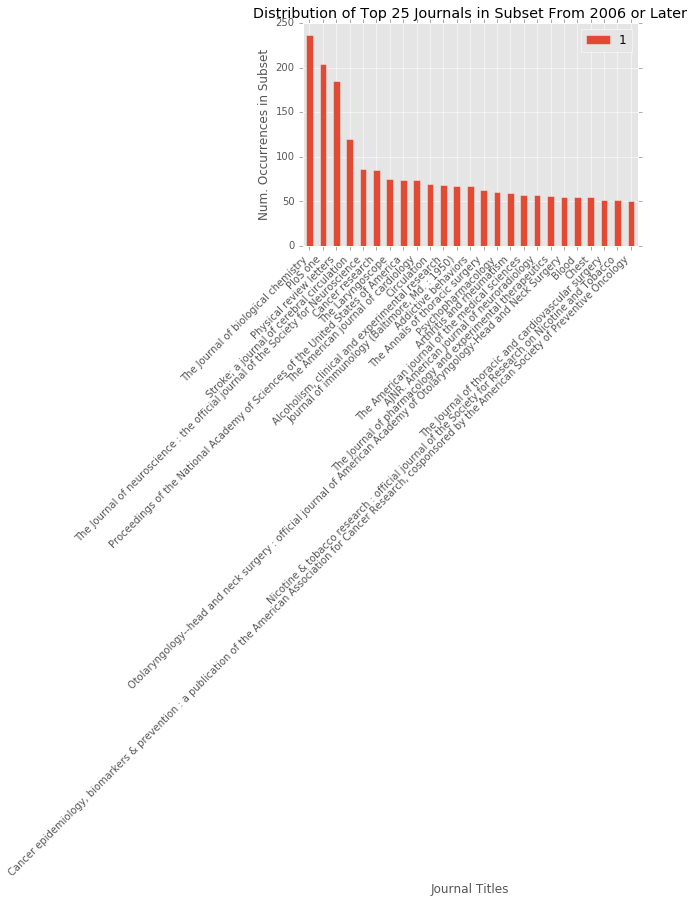

In [180]:
#make histogram

%matplotlib inline

pltjournals = df.plot.bar()
#xticks(arange(len(title_id)),title_id)
plt.title('Distribution of Top 25 Journals in Subset From 2006 or Later')
plt.xlabel("Journal Titles")
plt.ylabel("Num. Occurrences in Subset")
plt.xticks(x, labels, rotation=45, ha = 'right')

In [47]:
#Testing why so many unique journals in subset
#Try using ISSN code instead of journal name
#Failed because not every journal has an ISSN and for some reason there are
#many more unique ISSNs than journals
issns = []
uniqueIssns = []
titlesNoIssn = []
i = 0
for record in root.findall('MedlineCitation'):
    try:
        issn = record.find('Article').find('Journal').find('ISSN').text
        #get a list of titles
        issns.append(issn)
        #get a list of unique titles
        if issn not in uniqueIssns:
            uniqueIssns.append(issn)
    except AttributeError:
        title = record.find('Article').find('Journal').find('Title').text
        if title not in titlesNoIssn:
            titlesNoIssn.append(title)
    i = i + 1
print len(issns)
print len(uniqueIssns)
print len(titlesNoIssn)
print titlesNoIssn

32351
4857
14
['Journal of chromatography', 'International journal of obesity', u"La semaine des ho\u0302pitaux : organe fonde\u0301 par l'Association d'enseignement me\u0301dical des ho\u0302pitaux de Paris", 'Princess Takamatsu symposia', 'Journal of neural transmission. General section', 'Acta neurochirurgica. Supplementum', 'Brain research. Brain research reviews', 'International journal of obesity and related metabolic disorders : journal of the International Association for the Study of Obesity', 'Comparative biochemistry and physiology. Comparative physiology', 'International urogynecology journal and pelvic floor dysfunction', 'Medicinski arhiv', 'Brain research. Gene expression patterns', 'Medical image computing and computer-assisted intervention : MICCAI ... International Conference on Medical Image Computing and Computer-Assisted Intervention', 'CSH protocols']


In [48]:
#MedlineJournalInfo's NlmUniqueID
#Successful and matches our exact results for journals
#Reason to believe that journals are all unique and no naming mistakes
nlmIds = []
uniqueNlmIds = []
titlesNoNlmId = []
i = 0
for record in root.findall('MedlineCitation'):
    try:
        nlmId = record.find('MedlineJournalInfo').find('NlmUniqueID').text
        #get a list of ids
        nlmIds.append(nlmId)
        #get a list of unique ids
        if nlmId not in uniqueNlmIds:
            uniqueNlmIds.append(nlmId)
    except AttributeError:
        title = record.find('Article').find('Journal').find('Title').text
        if title not in titlesNoNlmId:
            titlesNoNlmId.append(title)
    i = i + 1
print len(nlmIds)
print len(uniqueNlmIds)
print len(titlesNoNlmId)
print titlesNoNlmId

32409
3579
0
[]


In [50]:
#Using ISO Abbreviation
#Appears to be some overlap with journal names, two less unique ISOs than journal names
#Affects 7 records who don't have ISOs (from same journal)
isos = []
uniqueIsos = []
titlesNoIso = []
i = 0
for record in root.findall('MedlineCitation'):
    try:
        iso = record.find('Article').find('Journal').find('ISOAbbreviation').text
        #get a list of ids
        isos.append(iso)
        #get a list of unique ids
        if iso not in uniqueIsos:
            uniqueIsos.append(iso)
    except AttributeError:
        title = record.find('Article').find('Journal').find('Title').text
        #if title not in titlesNoIso:
        titlesNoIso.append(title)
    i = i + 1
print len(isos)
print len(uniqueIsos)
print len(titlesNoIso)
print titlesNoIso

32402
3577
7
['Arthritis & rheumatology (Hoboken, N.J.)', 'Arthritis & rheumatology (Hoboken, N.J.)', 'Arthritis & rheumatology (Hoboken, N.J.)', 'Arthritis & rheumatology (Hoboken, N.J.)', 'Arthritis & rheumatology (Hoboken, N.J.)', 'Arthritis & rheumatology (Hoboken, N.J.)', 'Arthritis & rheumatology (Hoboken, N.J.)']
